####Step 1: Data Preprocessing
####Step 2: Data exploring and data visualization
####Step 3: Spliting the Data into Train and Test
####Step 4: Applying the alogrithm - Decision Tree and Random Forest
####Step 5: Using K-Fold cross validation
####Step 6: Finding accuracy, specificity 
####Step 7: ROC-AUC Curve
####Step 8: Comparing accuracy of Decision Tree and Random Forest


Importing Libraries

In [ ]:
#For Avoding the warning
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
#Upload file into google colab session
from google.colab import files
#Multidimensional array objects and a collection of routines for processing those arrays
import numpy as np
#For data analysis and data manipulation
import pandas as pd
#For 2D Graph
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
#For 3D Graph
import seaborn as sns
import plotly.express as px
from scipy import stats
#Spliting the data into train and test using sklearn library
from sklearn.model_selection import train_test_split 
#Feature scaling using the sklearn library
from sklearn.preprocessing import StandardScaler
#Fitting Decision Tree classifier to the training set  and testing set
from sklearn.tree import DecisionTreeClassifier 
#Fitting Random Forest to the training set and testing set
from sklearn.ensemble import RandomForestClassifier 
#Using metrics for confusion matrix, getting the accuracy score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
#Using k fold cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

Data Preprocessing

In [ ]:
#Uploading the file
file = files.upload() 
#Reading the csv File
Glass_Data = pd.read_csv("Glass_Identification_Data.csv") 
#Printing the top 5 rows from dataframe
Glass_Data.head()

Saving Glass_Identification_Data.csv to Glass_Identification_Data (6).csv


,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
#Getting how many rows and columns
Glass_Data.shape

(214, 11)

In [ ]:
#Getting the information of each feature
Glass_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [ ]:
#Checking the null values
Glass_Data.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [ ]:
#Getting the Statistical Information
Glass_Data.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Data Exploring and data visualization

Getting the Count of type of glass 

In [ ]:
#Grouping the type of glass and taking the count
df = pd.DataFrame(Glass_Data.groupby(by = ['Type of glass']).size().reset_index(name = 'count'))
#Getting count of type of glass
fig = px.pie(df, values="count" , names ="Type of glass",color_discrete_sequence = px.colors.sequential.RdBu, template = "plotly_dark")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',title = 'Count of Glass Type')
fig.show()

Histplot for each type of glass

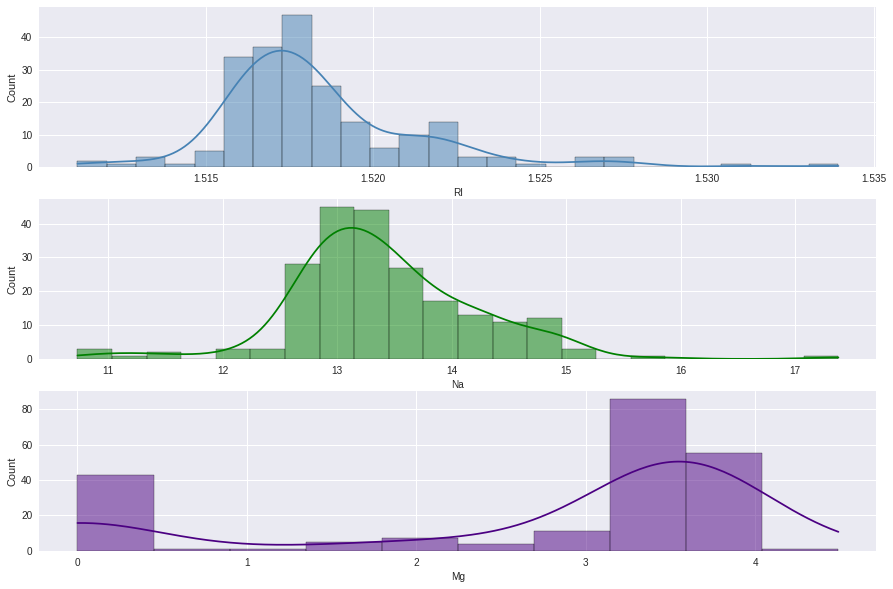

In [ ]:
#Setting the subplot figure size
plt.style.use("seaborn")
fig, ax =plt.subplots(3,1, figsize=(15,10)) 
#Histplot for RI
sns.histplot(x = Glass_Data["RI"], kde=True, ax=ax[0], color="steelblue");
ax[0].set_xlabel("RI",fontsize=10);
#Histplot for Na
sns.histplot(x = Glass_Data["Na"], kde=True, ax=ax[1], color="green");
ax[1].set_xlabel("Na",fontsize=10);
#Histplot for Mg
sns.histplot(x = Glass_Data["Mg"], kde=True, ax=ax[2], color="indigo");
ax[2].set_xlabel("Mg",fontsize=10);

With this 3 histplot, we can see none of the type of the glass is normally distributed either it is +ve skew or -ve skew

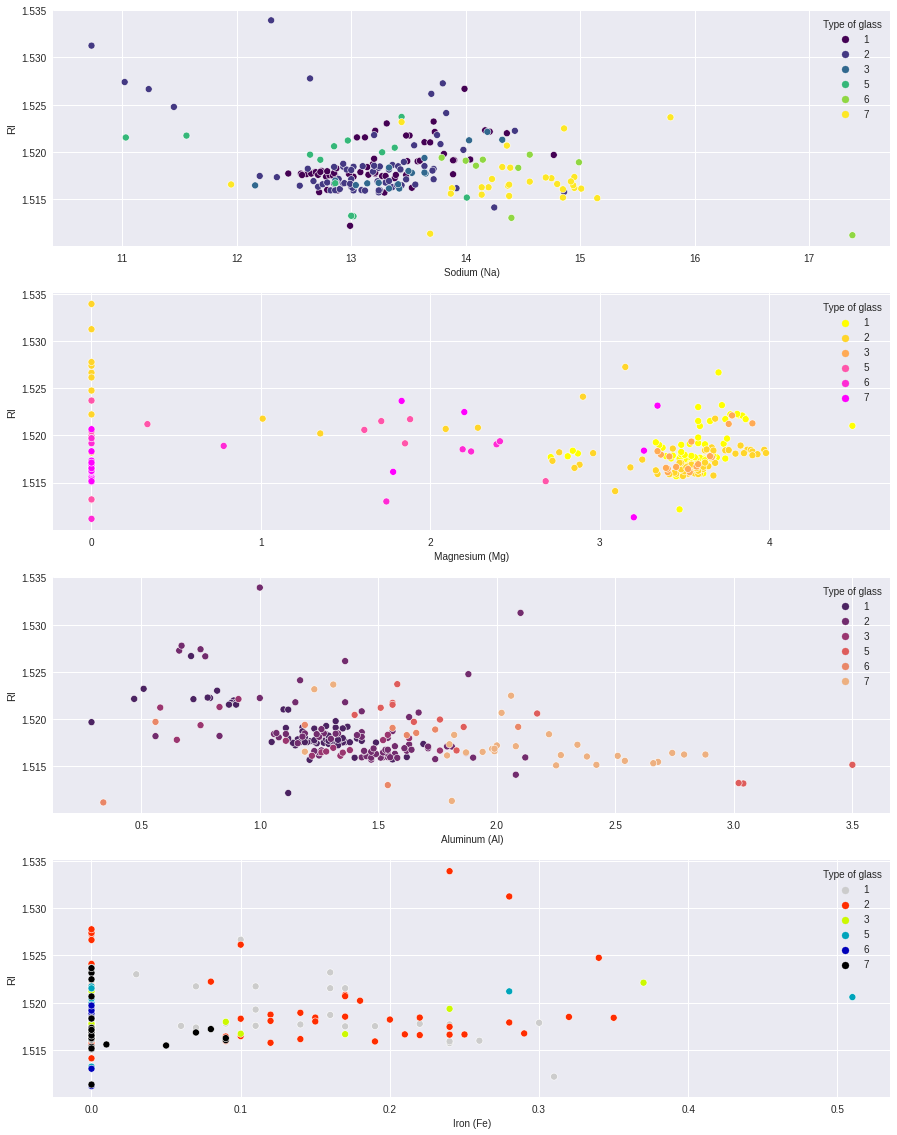

In [ ]:
plt.style.use("seaborn")
fig, ax =plt.subplots(4,1, figsize=(15,20)) 
#Scatterplot for Na with RI
sns.scatterplot(x = df['Na'], y = df['RI'], hue = df['Type of glass'], palette='viridis', legend=True, ax=ax[0])
ax[0].set_xlabel("Sodium (Na)",fontsize=10);
#Scatterplot for Mg with RI
sns.scatterplot(x = df['Mg'], y = df['RI'], hue = df['Type of glass'], palette='spring_r', legend=True, ax=ax[1])
ax[1].set_xlabel("Magnesium (Mg)",fontsize=10);
#Scatterplot for AL with RI
sns.scatterplot(x = df['Al'], y = df['RI'], hue = df['Type of glass'], palette='flare_r', legend=True, ax=ax[2]);
ax[2].set_xlabel("Aluminum (Al)",fontsize=10);
#Scatterplot for Fe with RI
sns.scatterplot(x = df['Fe'], y = df['RI'], hue = df['Type of glass'], palette='nipy_spectral_r', legend=True, ax=ax[3]);
ax[3].set_xlabel("Iron (Fe)",fontsize=10);

Realtionship b/w columns and type of glass using scatterplot

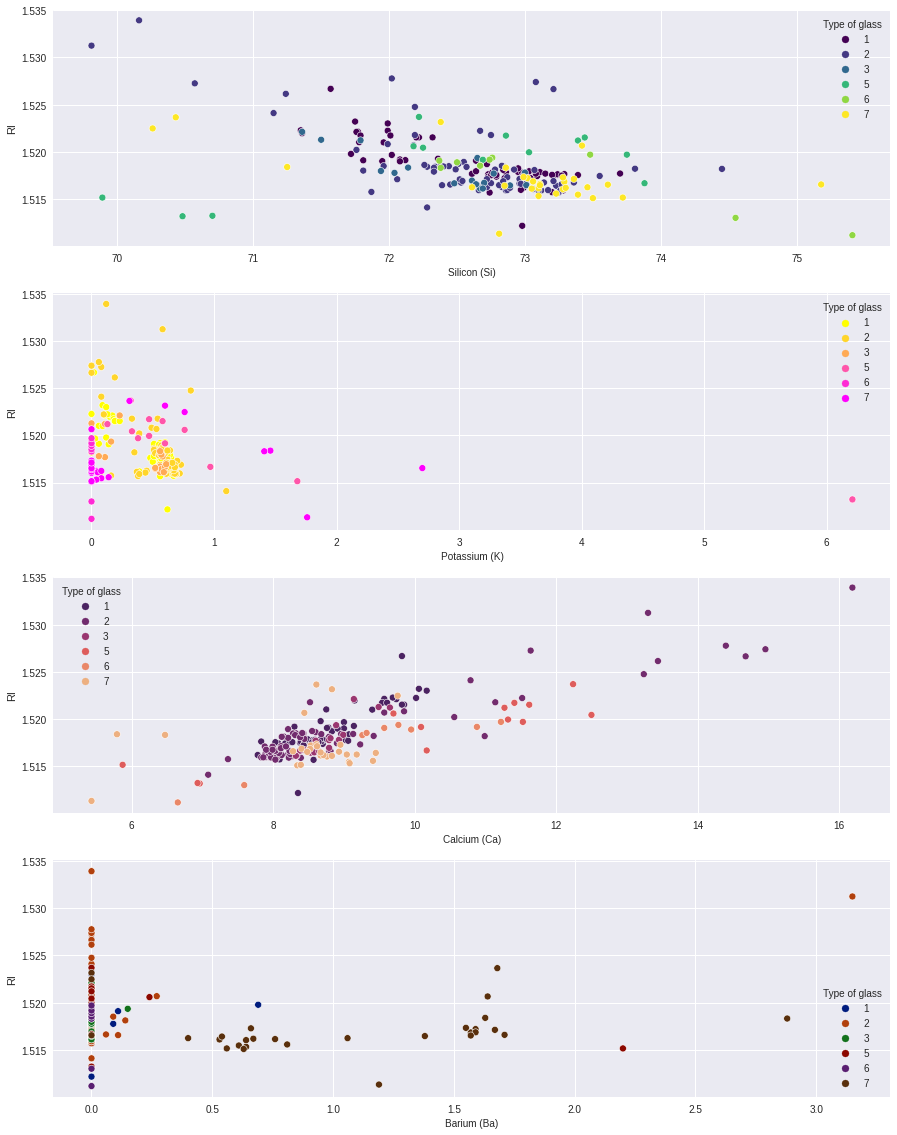

In [ ]:
plt.style.use("seaborn")
fig, ax =plt.subplots(4,1, figsize=(15,20))

sns.scatterplot(x = df['Si'], y = df['RI'], hue = df['Type of glass'], palette='viridis', legend=True, ax=ax[0])
ax[0].set_xlabel("Silicon (Si)",fontsize=10);

sns.scatterplot(x = df['K'], y = df['RI'], hue = df['Type of glass'], palette='spring_r', legend=True, ax=ax[1])
ax[1].set_xlabel("Potassium (K)",fontsize=10);

sns.scatterplot(x = df['Ca'], y = df['RI'], hue = df['Type of glass'], palette='flare_r', legend=True, ax=ax[2]);
ax[2].set_xlabel("Calcium (Ca)",fontsize=10);

sns.scatterplot(x = df['Ba'], y = df['RI'], hue = df['Type of glass'], palette='dark', legend=True, ax=ax[3]);
ax[3].set_xlabel("Barium (Ba)",fontsize=10);

Scatterplot of some correlated features.

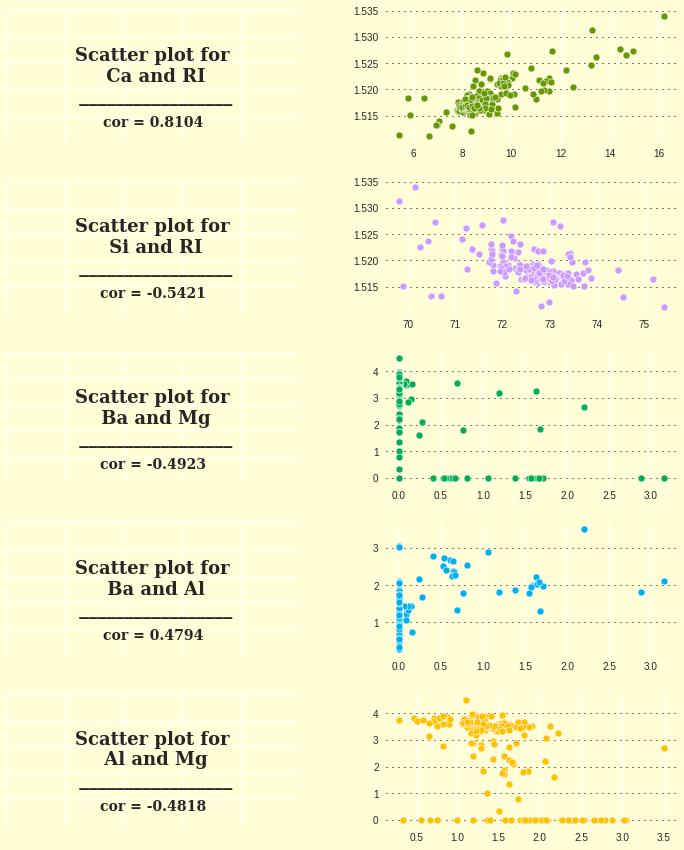

In [ ]:
background_color = '#FFFED7'
color_palette = ['#669900', '#CC99FF', '#00B050', '#00B0F0', '#FFC000', '#00FF00', '#002060', '#FF00FF', '#6600CC']
fig = plt.figure(figsize=(12, 15))
gs = fig.add_gridspec(5, 2)
gs.update(wspace=0.3, hspace=0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, 0])
ax7 = fig.add_subplot(gs[3, 1])
ax8 = fig.add_subplot(gs[4, 0])
ax9 = fig.add_subplot(gs[4, 1])

axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
fig.patch.set_facecolor(background_color)


# Ca and RI
cor = round(stats.pearsonr(df['Ca'], df['RI'])[0], 4)
ax0.text(0.5, 0.5,
        'Scatter plot for\n Ca and RI\n _________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontfamily='serif',
        fontweight='bold')
ax0.text(0.5, 0.15,
        'cor = ' + str(cor),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=14, fontfamily='serif',
        fontweight='bold')

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.scatterplot(x='Ca', y='RI', data=df, ax=ax1, color=color_palette[0])


# Si and RI
cor = round(stats.pearsonr(df['Si'], df['RI'])[0], 4)
ax2.text(0.5, 0.5,
        'Scatter plot for\n Si and RI\n _________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontfamily='serif',
        fontweight='bold')
ax2.text(0.5, 0.15,
        'cor = ' + str(cor),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=14, fontfamily='serif',
        fontweight='bold')

ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.scatterplot(x='Si', y='RI', data=df, ax=ax3, color=color_palette[1])


# Ba and Mg
cor = round(stats.pearsonr(df['Ba'], df['Mg'])[0], 4)
ax4.text(0.5, 0.5,
        'Scatter plot for\n Ba and Mg\n _________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontfamily='serif',
        fontweight='bold')
ax4.text(0.5, 0.15,
        'cor = ' + str(cor),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=14, fontfamily='serif',
        fontweight='bold')

ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.scatterplot(x='Ba', y='Mg', data=df, ax=ax5, color=color_palette[2])


# Ba and Al
cor = round(stats.pearsonr(df['Ba'], df['Al'])[0], 4)
ax6.text(0.5, 0.5,
        'Scatter plot for\n Ba and Al\n _________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontfamily='serif',
        fontweight='bold')
ax6.text(0.5, 0.15,
        'cor = ' + str(cor),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=14, fontfamily='serif',
        fontweight='bold')

ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.scatterplot(x='Ba', y='Al', data=df, ax=ax7, color=color_palette[3])


# Al and Mg
cor = round(stats.pearsonr(df['Al'], df['Mg'])[0], 4)
ax8.text(0.5, 0.5,
        'Scatter plot for\n Al and Mg\n _________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontfamily='serif',
        fontweight='bold')
ax8.text(0.5, 0.15,
        'cor = ' + str(cor),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=14, fontfamily='serif',
        fontweight='bold')

ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.scatterplot(x='Al', y='Mg', data=df, ax=ax9, color=color_palette[4])


for ax in axes:
    ax.set_facecolor(background_color)
    ax.set_xlabel('')
    ax.set_ylabel('')
    for s in ['top', 'right']:
        ax.spines[s].set_visible(False)

for ax in [ax0, ax2, ax4, ax6, ax8]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(left=False, bottom=False)
    for s in ['left', 'bottom']:
        ax.spines[s].set_visible(False)

In [ ]:
#Getting the rows
Glass_Data.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
#Copying data in df
df = Glass_Data.copy()

In [ ]:
#Getting the rows
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


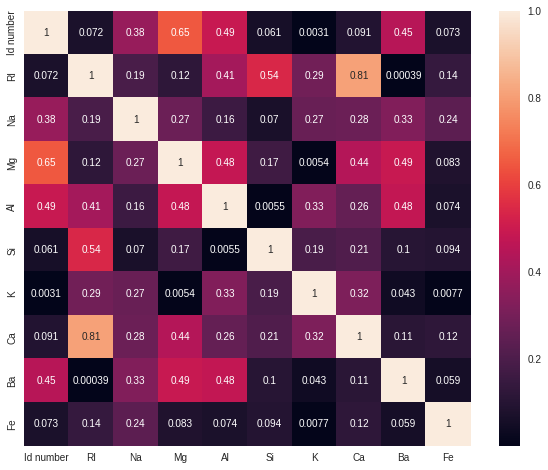

In [ ]:
#Seeing the correlation for each feature using the heatmap
data = df.drop('Type of glass',axis=1)
plt.figure(figsize=(10,8))
sns.heatmap(data.corr().abs(), annot= True)
plt.show()

Spliting the data into training and testing

In [ ]:
#Creating the variable x and y
x = Glass_Data.iloc[:, :-1]
y = Glass_Data.iloc[:, -1]

In [ ]:
#split the data into train and test set
X_train, X_test, y_train, y_test= train_test_split(x, y,test_size = 0.2,shuffle = True,random_state = 0)  #shuffle the data to avoid bias
#printing the shape of x_train,x_test,y_train,y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(171, 10)
(171,)
(43, 10)
(43,)


Feature Scaling

In [ ]:
#Creating the variable for Standardscaler object
scaler = StandardScaler()
#Fit the model
scaler.fit(X_train)
#Making the transform for x train and x test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

Applying the Algorithm

Decision Tree

In [ ]:
#Creating the variable for Decision Tree Classifier object
classifier = DecisionTreeClassifier(criterion='entropy', random_state = 0 ) #This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.
#Fit X_train and Y_train to the classifier
classifier.fit(X_train, y_train)
#Making the prediction on X_test
y_pred = classifier.predict(X_test)
#Making the prediction on X_train
y_pred1 = classifier.predict(X_train)
#comparing actual response values (y_train with predicted response values (y_pred1)
DF_Train =  metrics.accuracy_score(y_train, y_pred1)*100
print("Decision Tree model accuracy(in %) for Training:",DF_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
DF_Test = metrics.accuracy_score(y_test, y_pred)*100
print("Descision Tree  model accuracy(in %) for Testing:", DF_Test)

Decision Tree model accuracy(in %) for Training: 100.0
Descision Tree  model accuracy(in %) for Testing: 95.34883720930233


Cross Validation with K-Fold 

In [ ]:
#Split dataset into k consecutive folds (without shuffling by default)
#Creating the variable num_folds for how many no. of folds
num_folds = 5
#t maintains the same class ratio throughout the K folds as the ratio in the original dataset.
kfold=StratifiedKFold(n_splits = num_folds)
#Printing the results
results=cross_val_score(classifier,X_train,y_train,cv = kfold)
DF_result = results.mean()*100
print("CV-Accuracy :" , DF_result)

CV-Accuracy : 98.82352941176471


Confusion Matrix, Classification Report For Decision Tree

In [ ]:
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Decision Tree:")
print(result)
#Getting the classification report
result1 = classification_report(y_test, y_pred)
print("Classification Report for Decision Tree:",)
print (result1)
#Overall accuracy
result2 = accuracy_score(y_test,y_pred)
print("Overall Accuracy For Decision Tree:",result2)

Confusion Matrix for Decision Tree:
[[ 9  0  0  0  0  0]
 [ 0 17  2  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      0.89      0.94        19
           3       0.71      1.00      0.83         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         6

    accuracy                           0.95        43
   macro avg       0.95      0.98      0.96        43
weighted avg       0.97      0.95      0.96        43

Overall Accuracy For Decision Tree: 0.9534883720930233


Specificity and Sensitivity for Decision Tree

In [ ]:
FP = result.sum(axis=0) - np.diag(result) 
FN = result.sum(axis=1) - np.diag(result)
TP = np.diag(result)
TN = result.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result))
# Sensitivity, hit rate, recall, or true positive rate
TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
TNR = ((TN/(TN+FP))).mean()*100 

print('Sensitivity:' ,TPR)
print('Specificity: ' ,TNR)


Sensitivity: 98.24561403508773
Specificity:  99.12280701754386


ROC - AUC Curve for Decision Tree

ROC-AUC for Class 1: 1.0
ROC-AUC for Class 2: 0.9473684210526316
ROC-AUC for Class 3: 0.9736842105263158
ROC-AUC for Class 4: nan
ROC-AUC for Class 5: 0.47560975609756095
ROC-AUC for Class 6: 0.4268292682926829


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



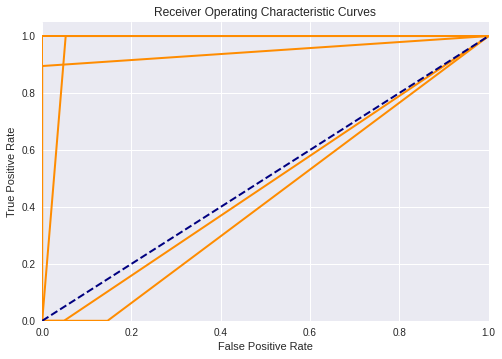

In [ ]:
#Binarize the output
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6])
n_classes = y_test_bin.shape[1]
#Calculate the y_score
y_score = classifier.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('ROC-AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

Random Forest

In [ ]:
#Creating the variable for Random Forest object
RFClassifier = RandomForestClassifier(n_estimators = 100 ,criterion='entropy', random_state = 0 ) #This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.
#Fit X_train and Y_train to the classifier
RFClassifier.fit(X_train, y_train)
#Making the prediction on X_test
y_pred2 = RFClassifier.predict(X_test)
#Making the prediction on X_train
y_pred3 = RFClassifier.predict(X_train)
#comparing actual response values (y_train with predicted response values (y_pred1)
RF_Train = metrics.accuracy_score(y_train, y_pred3)*100
print("Random Forest model accuracy(in %) for Training:",RF_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
RF_Test = metrics.accuracy_score(y_test, y_pred2)*100
print("Random Forest model accuracy(in %) for Testing:", RF_Test)

Random Forest model accuracy(in %) for Training: 100.0
Random Forest model accuracy(in %) for Testing: 97.67441860465115


Cross Validation with K-Fold

In [ ]:
#Split dataset into k consecutive folds (without shuffling by default)
#Creating the variable num_folds for how many no. of folds
num_folds = 5
#t maintains the same class ratio throughout the K folds as the ratio in the original dataset.
kfold=StratifiedKFold(n_splits = num_folds)
#Printing the results
results1 = cross_val_score(RFClassifier,X_train,y_train,cv = kfold)
RF_results = results1.mean()*100
print("CV-Accuracy :" , RF_results)

CV-Accuracy : 95.88235294117649


Confusion Matrix, Classification Report For Random Forest

In [ ]:
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix For Random Forest:")
print(result2)
#Getting the classification report
result3 = classification_report(y_test, y_pred2)
print("Classification Report For Random Forest:",)
print (result3)
#Overall accuracy
result3 = accuracy_score(y_test,y_pred2)
print("Overall Accuracy For Random Forest:",result3)

Confusion Matrix For Random Forest:
[[ 9  0  0  0  0  0]
 [ 0 18  1  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
Classification Report For Random Forest:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      0.95      0.97        19
           3       0.83      1.00      0.91         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         6

    accuracy                           0.98        43
   macro avg       0.97      0.99      0.98        43
weighted avg       0.98      0.98      0.98        43

Overall Accuracy For Random Forest: 0.9767441860465116


Specificity and Sensitivity for Random Forest

In [ ]:
FP = result2.sum(axis=0) - np.diag(result) 
FN = result2.sum(axis=1) - np.diag(result)
TP = np.diag(result)
TN = result2.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result))
# Sensitivity, hit rate, recall, or true positive rate
TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
TNR = ((TN/(TN+FP))).mean()*100 

print('Sensitivity:' ,TPR)
print('Specificity: ' ,TNR)

Sensitivity: 98.24561403508773
Specificity:  98.86695906432749


ROC-AUC for Class 1: 1.0
ROC-AUC for Class 2: 1.0
ROC-AUC for Class 3: 0.9947368421052631
ROC-AUC for Class 4: nan
ROC-AUC for Class 5: 0.8109756097560975
ROC-AUC for Class 6: 0.7621951219512195


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



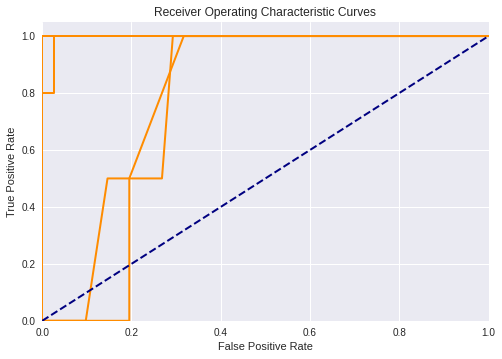

In [ ]:
#Binarize the output
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6])
n_classes = y_test_bin.shape[1]
#Calculate the y_score
y_score = RFClassifier.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('ROC-AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

Comparing the Model

In [ ]:
#Comparing the Model 
models =  [('Decision Tree Classification', DF_Train, DF_Test),('Random Forest Classification' , RF_Train, RF_Test)]
predict = pd.DataFrame(data = models , columns =['Model', 'Training Accuracy', 'Testing Accuracy'])
predict

,Model,Training Accuracy,Testing Accuracy
0,Decision Tree Classification,100.0,95.348837
1,Random Forest Classification,100.0,97.674419


In [ ]:
#Comparing the Model with Cross Validation
models1 =  [('Decision Tree Classification with Cross Validation', DF_result),('Random Forest Classification with Cross Validation' , RF_results)]
predict1 = pd.DataFrame(data = models1 , columns =['Model', 'Accuracy'])
predict1

,Model,Accuracy
0,Decision Tree Classification with Cross Valida...,98.823529
1,Random Forest Classification with Cross Valida...,95.882353


[Text(0.25, 0.9, 'X[0] <= -0.556\nentropy = 2.16\nsamples = 171\nvalue = [61, 57, 12, 11, 7, 23]'),
 Text(0.125, 0.7, 'entropy = 0.0\nsamples = 61\nvalue = [61, 0, 0, 0, 0, 0]'),
 Text(0.375, 0.7, 'X[0] <= 0.642\nentropy = 1.897\nsamples = 110\nvalue = [0, 57, 12, 11, 7, 23]'),
 Text(0.25, 0.5, 'entropy = 0.0\nsamples = 57\nvalue = [0, 57, 0, 0, 0, 0]'),
 Text(0.5, 0.5, 'X[0] <= 1.157\nentropy = 1.864\nsamples = 53\nvalue = [0, 0, 12, 11, 7, 23]'),
 Text(0.25, 0.3, 'X[3] <= 0.234\nentropy = 0.999\nsamples = 23\nvalue = [0, 0, 12, 11, 0, 0]'),
 Text(0.125, 0.1, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 0, 11, 0, 0]'),
 Text(0.375, 0.1, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 12, 0, 0, 0]'),
 Text(0.75, 0.3, 'X[0] <= 1.293\nentropy = 0.784\nsamples = 30\nvalue = [0, 0, 0, 0, 7, 23]'),
 Text(0.625, 0.1, 'entropy = 0.0\nsamples = 7\nvalue = [0, 0, 0, 0, 7, 0]'),
 Text(0.875, 0.1, 'entropy = 0.0\nsamples = 23\nvalue = [0, 0, 0, 0, 0, 23]')]

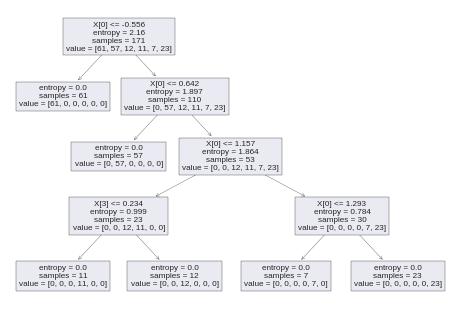

In [ ]:
from sklearn import tree
tree.plot_tree(classifier)